In [2]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [5]:
# pathMAC="/Users/jfmv/Documents/Proyectos/Moire-Phonon_QMC/BM_bandstructure"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
pathMAC='/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite'
pathUBU='/home/juan/Documents/Projects/Delafossites/integration_delafossite'
pathy=pathchow

In [31]:
path=pathy+'/data/nu_sweep_2022-05-24-15-50-41'
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames)


reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-05-24-15-50-41/nu_sweep_0.3/data2022-05-24-15-48-27.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-05-24-15-50-41/nu_sweep_0.05/data2022-05-24-15-42-41.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-05-24-15-50-41/nu_sweep_0.2/data2022-05-24-15-46-46.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-05-24-15-50-41/nu_sweep_0.5/data2022-05-24-15-50-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/nu_sweep_2022-05-24-15-50-41/nu_sweep_0.1/data2022-05-24-15-44-49.h5


Machine arg is, CH1


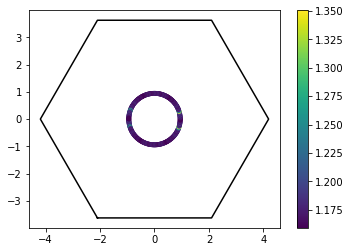

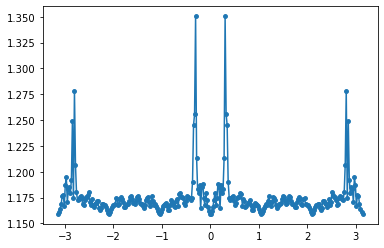

In [32]:
df2=df.loc[(df['nu'] ==0.05 )]
tss=df2['T'].unique()


l=Lattice.TriangLattice(10,10,'CH1')
[vx,vy]=l.boundary()
plt.plot(vx,vy, c='k')
plt.scatter(df2['KFX'], df2['KFY'],c=df2['SE'],  s=15)
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()


df2=df2.sort_values(by=['theta'])
plt.scatter(df2['theta'], df2['SE'],  s=15)
plt.plot(df2['theta'], df2['SE'])
# plt.ylim([1.98,2.07])
plt.show()

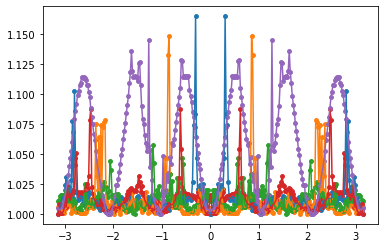

In [33]:
for i in [0.05,0.1,0.2,0.3,0.5]:
    df2=df.loc[(df['nu'] ==i )]
    tss=df2['T'].unique()



    df2=df2.sort_values(by=['theta'])
    plt.scatter(df2['theta'], df2['SE']/np.min(df2['SE']),  s=15)
    plt.plot(df2['theta'], df2['SE']/np.min(df2['SE']))
    # plt.ylim([1.98,2.07])
plt.show()

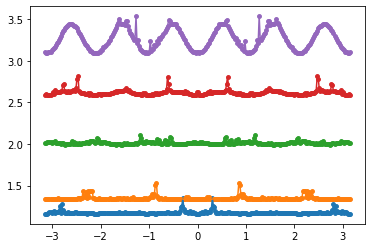

In [34]:
for i in [0.05,0.1,0.2,0.3,0.5]:
    df2=df.loc[(df['nu'] ==i )]
    tss=df2['T'].unique()



    df2=df2.sort_values(by=['theta'])
    plt.scatter(df2['theta'], df2['SE'],  s=15)
    plt.plot(df2['theta'], df2['SE'])
    # plt.ylim([1.98,2.07])
plt.show()